# Workflow for Artificial Neural Network (ANN) Model on Weather Data

## Data Preparation
1. **Import Required Libraries**: Load essential libraries for data manipulation, visualization, and modeling, including `pandas`, `numpy`, `matplotlib`, and `sklearn`.
2. **Load Scaled Weather Data**: Import the preprocessed dataset containing scaled temperature and weather variables for multiple stations.
3. **Load Answer Dataset**: Import the dataset with labels for 'pleasant' (1) and 'unpleasant' (0) weather days.
4. **Optimize Data**:
   - Create `X` (feature matrix) by dropping `DATE` and `MONTH` columns from the weather data.
   - Prepare `y` (target vector) by dropping the `DATE` column from the answer dataset.
5. **Train-Test Split**: Split the data into training and testing sets for evaluating the model's performance on unseen data.

## ANN Model Implementation
6. **Why Scaling Matters for ANN**: Explain the importance of scaling in ANN models to ensure features contribute equally and improve training convergence.
7. **Train ANN for Scenario #1**:
   - Configure the ANN with three hidden layers of sizes (38, 18, 28), maximum iterations of 2800, and a tolerance of 1e-11.
   - Fit the model to the training data and evaluate training and testing accuracy.
8. **Train ANN for Scenario #2**:
   - Adjust the ANN configuration with hidden layers (30, 15, 10), maximum iterations of 2000, increased tolerance of 1e-5, regularization (`alpha`) of 0.001, and early stopping.
   - Fit the model and evaluate performance.
9. **Train ANN for Scenario #3**:
   - Further refine the ANN with hidden layers (50, 30, 15), maximum iterations of 3000, tolerance of 1e-5, and regularization (`alpha`) of 0.0005.
   - Fit the model and evaluate training and testing performance to identify the best configuration.

## Model Evaluation
10. **Evaluate Model Accuracy**:
    - Report training and testing accuracy for each scenario.
    - Highlight overfitting, underfitting, or balanced performance based on accuracy metrics.
11. **Confusion Matrix Analysis**:
    - Loop through weather stations or metrics to generate and visualize confusion matrices for each scenario.
    - Use `ConfusionMatrixDisplay` for clear visualization of true positives, false positives, false negatives, and true negatives.

## Scenario Comparison
12. **Scenario #1**: 
    - Training accuracy: 75.6%, Testing accuracy: 66.4%.
    - Observations: Potential overfitting; model performs well on training data but struggles with generalization.
13. **Scenario #2**:
    - Training accuracy: 61.9%, Testing accuracy: 59.2%.
    - Observations: Reduced overfitting but underperforms overall, indicating a simpler model may not capture all patterns.
14. **Scenario #3**:
    - Training accuracy: 76.5%, Testing accuracy: 65.5%.
    - Observations: Best balance between training and testing performance, capturing patterns effectively without extreme overfitting.

## Visualization and Insights
15. **Confusion Matrix Visualization**:
    - Plot confusion matrices for each weather station across all scenarios.
    - Compare matrices to assess model performance in classifying 'pleasant' and 'unpleasant' weather days.
16. **Performance Trade-Offs**:
    - Highlight the trade-offs between model complexity and accuracy across scenarios.
    - Discuss how regularization and early stop---ping help balance overfitting and underfitting.

## Challenges & Adjustments
- **Overfitting**: Use regularization (`alpha`) and early stopping to prevent the model from capturing excessive noise in the training data.
- **Underperformance**: Fine-tune the number of layers, nodes per layer, and learning rate to improve generalization.
- **Class Imbalance**: Address imbalanced datasetss or if this structure aligns with your current workflow!

In [69]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns  # For heatmap visualization of the confusion matrix
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.neural_network import MLPClassifier  # For the ANN model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay  # For evaluating model performance and confusion matrices
from sklearn.preprocessing import StandardScaler

Running an artificial neural network (ANN) model is better done on scaled data because ANNs are sensitive to the range and scale of input features. If the data isn't scaled, features with larger ranges can dominate the learning process, leading to inefficient training and poor performance. Scaling ensures that all input features contribute equally, helps the model converge faster during training, and improves overall accuracy. Therefore, the data to import will be the scaled data frame.

In [4]:
# Loading the scaled weather data
weather_data_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Data Sets\01 Raw Data\weather-data_scaled.csv'
weather_data = pd.read_csv(weather_data_path)

weather_data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [6]:
# Loading the answer dataset for pleasant/unpleasant weather
answers_data_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Data Sets\01 Raw Data\1.4.Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'
answers_data = pd.read_csv(answers_data_path)

answers_data.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### • Optimazing Data for Artificial Neural Network

In [10]:
# Dropping the three weather stations that don’t have enough data to create a supervised answer set:

df_weather=weather_data.drop(columns=
 ['GDANSK_cloud_cover',
  'GDANSK_humidity',
  'GDANSK_precipitation',
  'GDANSK_snow_depth',
  'GDANSK_temp_mean',
  'GDANSK_temp_min',
  'GDANSK_temp_max','ROMA_cloud_cover',
  'ROMA_wind_speed',
  'ROMA_humidity',
  'ROMA_pressure',
  'ROMA_sunshine',
  'ROMA_temp_mean','TOURS_wind_speed',
  'TOURS_humidity',
  'TOURS_pressure',
  'TOURS_global_radiation',
  'TOURS_precipitation',
  'TOURS_temp_mean',
  'TOURS_temp_min',
  'TOURS_temp_max'])

df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


### • Making 'X' and 'y' data sets and dropping “DATE” and “MONTH” from weather station data and “DATE” from answer data set

In [15]:
# Creating 'X' and 'y' for future training and testing sets

X = df_weather.drop(['DATE', 'MONTH'], axis=1)
y = answers_data.drop(['DATE'],axis=1)

In [17]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# Reviewing shapes of training and test sets

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (17212, 147)
Testing Features Shape: (5738, 147)
Training Labels Shape: (17212, 15)
Testing Labels Shape: (5738, 15)


---

### • Running the Artificial Neural Network (ANN) model:
On the ClamteWins scaled data until findind convergency through testing out the number of layers, number of nodes per layer, max iterations, and tolerance

### SCENARIO #1:

In [29]:
#Train and test the ANN model
# SCENARIO 1: Adjusting the number of layers, nodes, iterations, and tolerance
mlp = MLPClassifier(hidden_layer_sizes=(38, 18, 28),  # Three hidden layers with specified nodes
                     max_iter=2800,                   # Maximum number of iterations
                     tol=1e-11,                       # Tolerance for stopping criteria
                     random_state=42)                 # For reproducibility

In [35]:
# Fit the model to the training data
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(38, 18, 28), max_iter=2800, random_state=42,
              tol=1e-11)

In [37]:
# Evaluate the model
# Accuracy on the training data
y_pred_train = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7557518010690216


In [39]:
# Accuracy on the testing data
y_pred_test = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.6639944231439526


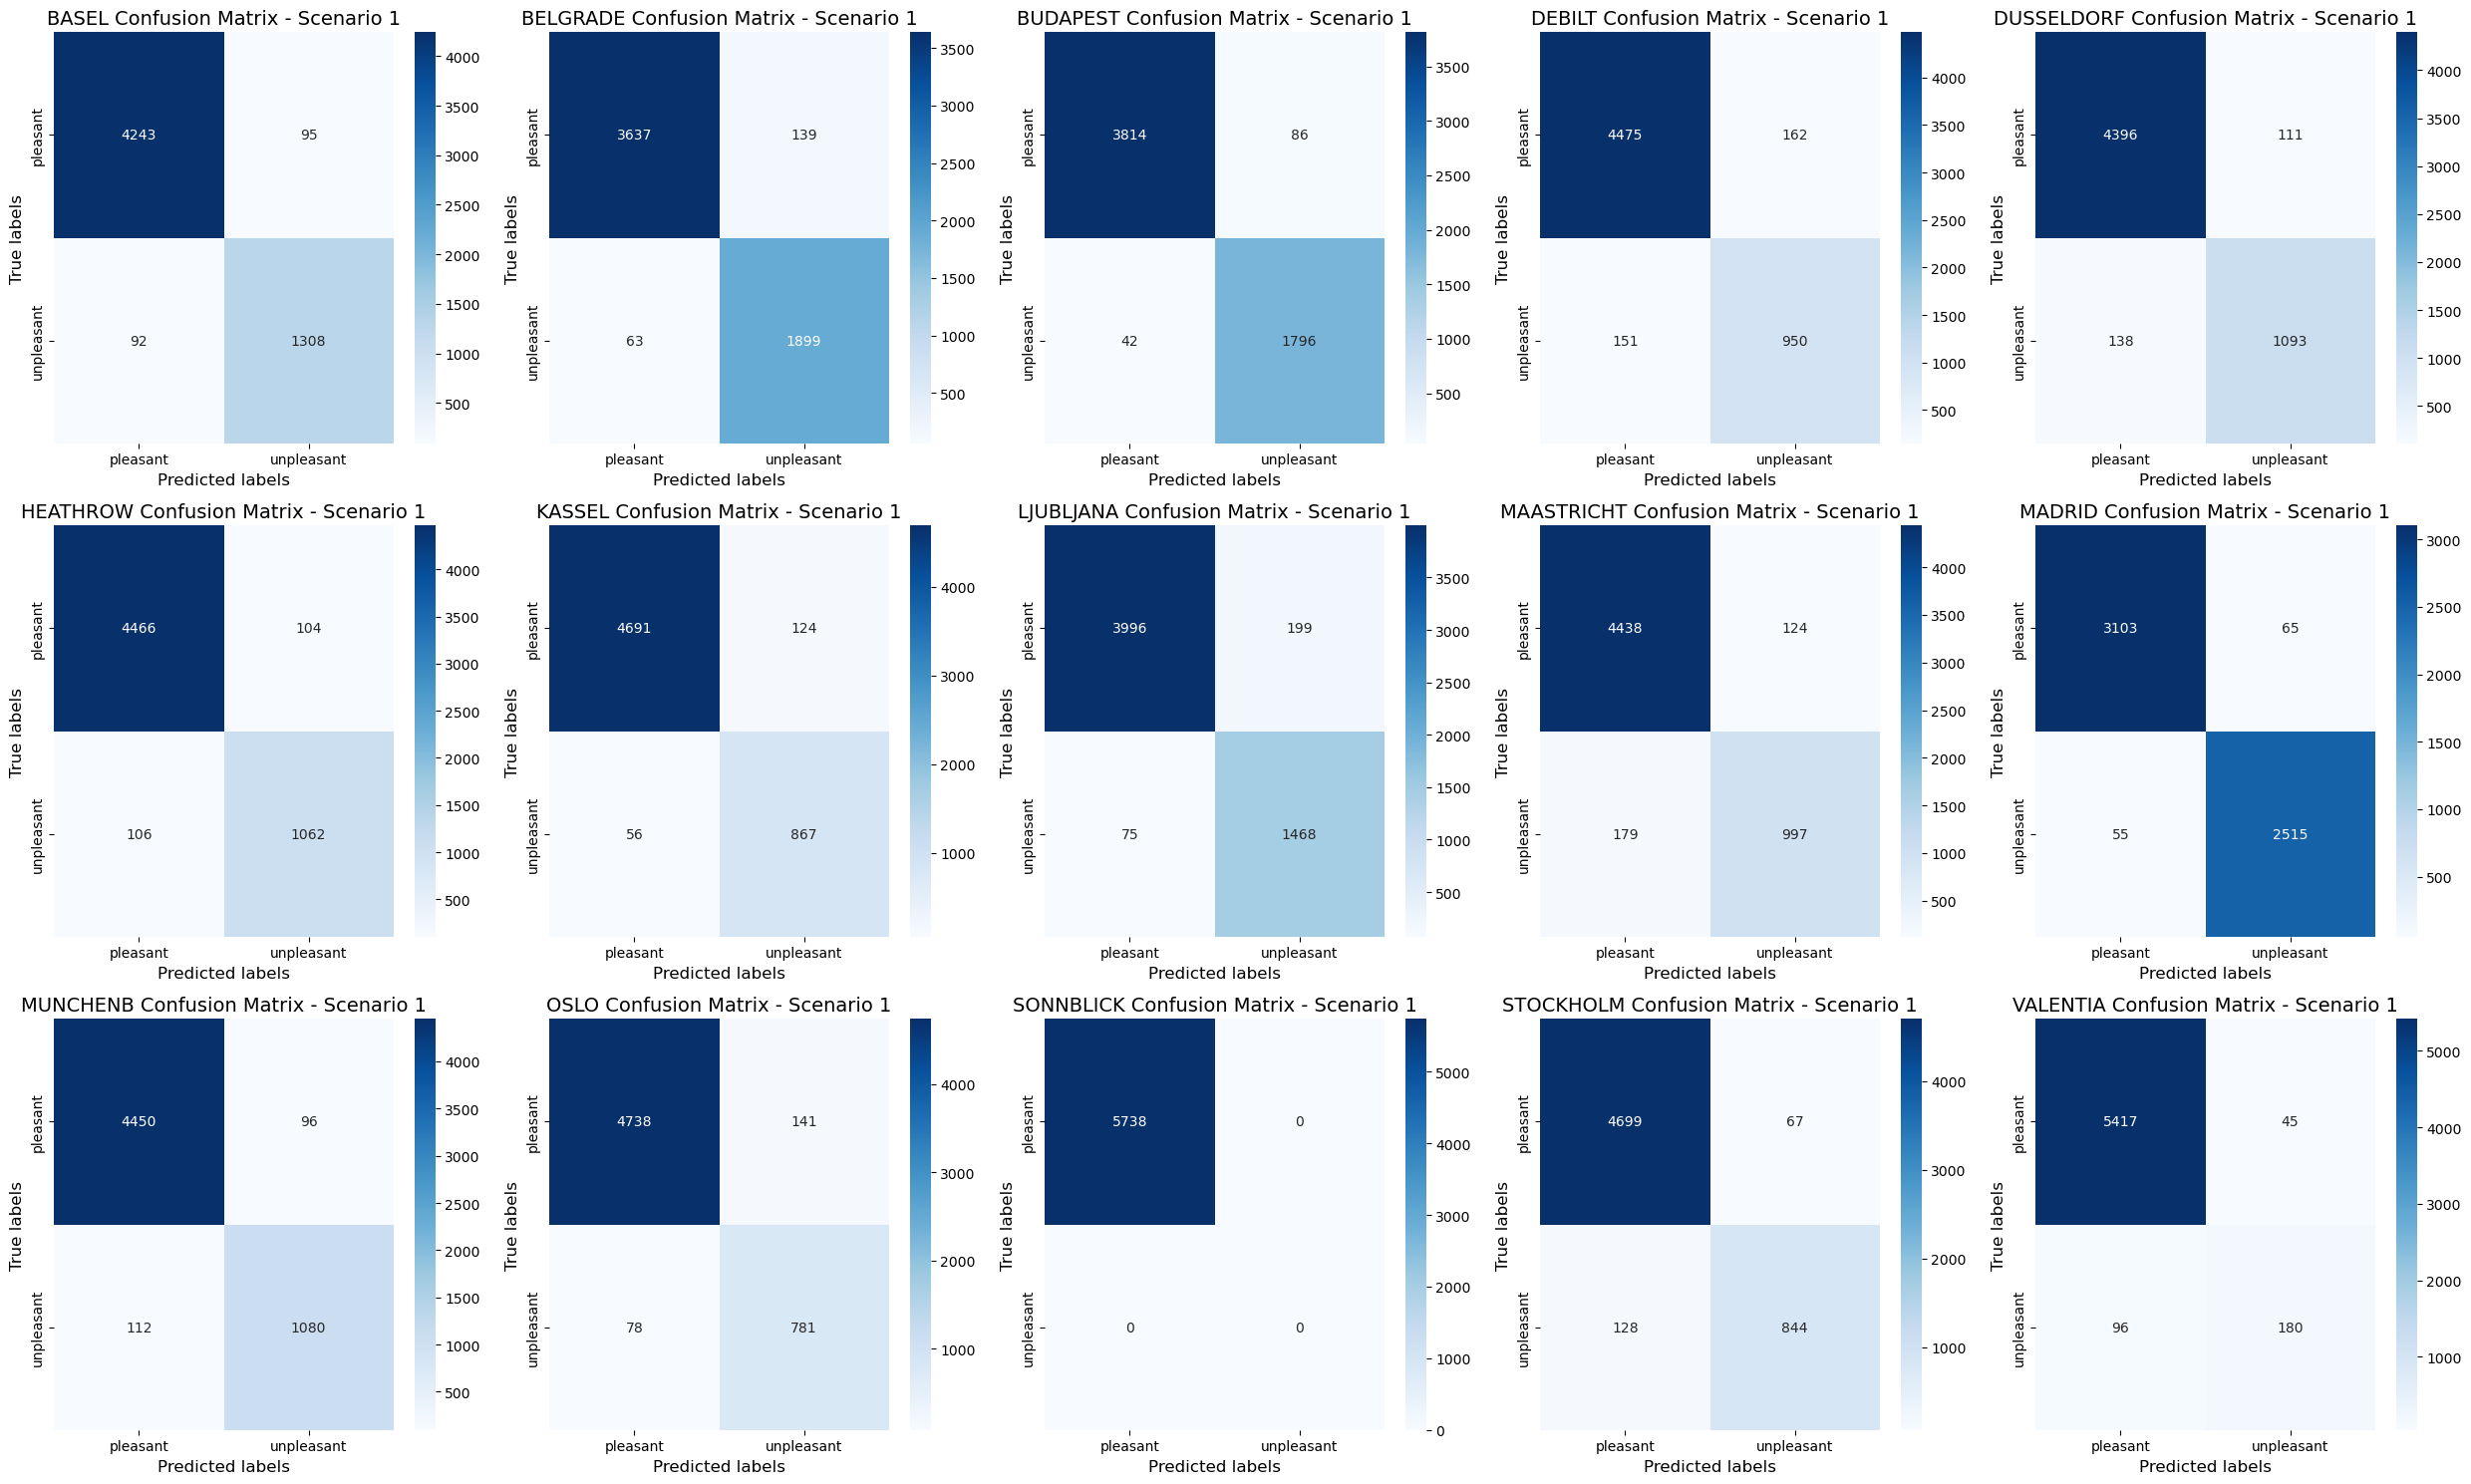

In [84]:
# Define the labels and initialize the figure for SCENARIO #1
labels = ['pleasant', 'unpleasant']
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()

# Initialize and fit the model for Scenario 1
mlp_scenario1 = MLPClassifier(hidden_layer_sizes=(38, 18, 28), max_iter=2800, tol=1e-11, random_state=42)
mlp_scenario1.fit(X_train, y_train)

# Generate predictions for Scenario 1
y_pred_test_scenario1 = mlp_scenario1.predict(X_test)

# Initialize figure for confusion matrices for Scenario 1
fig, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
key = "_pleasant_weather"

# Loop through locations to plot confusion matrices for each weather station
for i in range(3):  # Number of rows
    for j in range(5):  # Number of columns
        if count < len(locations):  # Ensure we don’t exceed the number of locations
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test_scenario1[:, count], labels=[0, 1])
            sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax[i, j])  # Annotate cells with values
            ax[i, j].set_xlabel('Predicted labels', fontsize=12)
            ax[i, j].set_ylabel('True labels', fontsize=12)
            ax[i, j].set_title(f'{name} Confusion Matrix - Scenario 1', fontsize=14)
            ax[i, j].xaxis.set_ticklabels(labels, fontsize=10)
            ax[i, j].yaxis.set_ticklabels(labels, fontsize=10)
            count += 1

# Adjust layout and save the plot for Scenario 1
plt.tight_layout()
output_path_scenario1 = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\1.5 Task\Scenario1_confusion_matrices.png'
plt.savefig(output_path_scenario1)
plt.show()

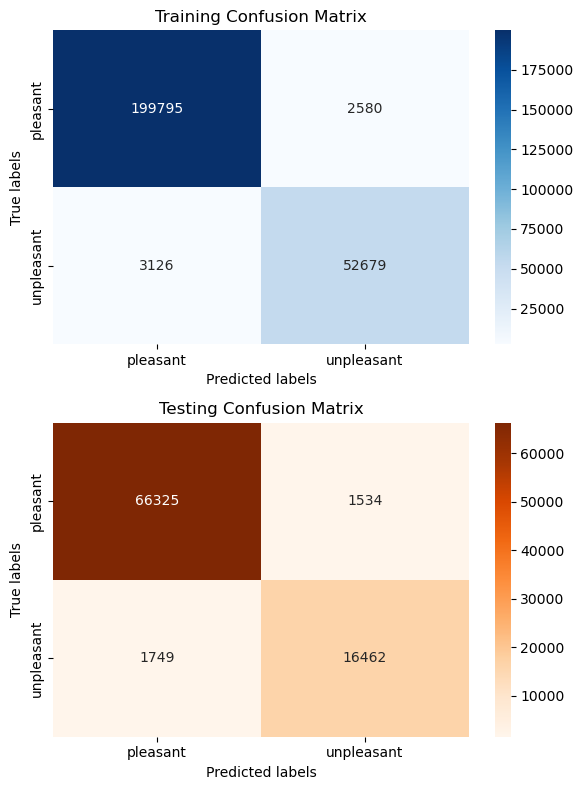

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the labels for binary classification
labels = ['pleasant', 'unpleasant']

# Initialize the figure for subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 8))  # Two rows for training and testing matrices

# Confusion matrix for training data
cm_train = confusion_matrix(y_train.values.ravel(), y_pred_train.ravel(), labels=[0, 1])
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=axes[0])  # Training confusion matrix
axes[0].set_title('Training Confusion Matrix')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
axes[0].xaxis.set_ticklabels(labels)
axes[0].yaxis.set_ticklabels(labels)

# Confusion matrix for testing data
cm_test = confusion_matrix(y_test.values.ravel(), y_pred_test.ravel(), labels=[0, 1])
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Oranges', ax=axes[1])  # Testing confusion matrix
axes[1].set_title('Testing Confusion Matrix')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')
axes[1].xaxis.set_ticklabels(labels)
axes[1].yaxis.set_ticklabels(labels)

# Adjust layout
plt.tight_layout()

# Save the figure
#output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\ANN_confusion_matrices_SCENARIO_1.png'
#plt.savefig(output_path)

# Show the plot
plt.show()


Scenario #1 model shows a training accuracy of 75.6% and a testing accuracy of 66.4%. This discrepancy suggests a potential case of overfitting, where the model performs better on the training data than on the testing data.

### SCENARIO #2:

In [54]:
mlp = MLPClassifier(hidden_layer_sizes=(30, 15, 10),  # Adjusted layer sizes
                    max_iter=2000,                   # Reduced max iterations
                    tol=1e-5,                        # Increased tolerance
                    alpha=0.001,                     # Added regularization
                    early_stopping=True,             # Enable early stopping
                    random_state=42)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Evaluate the adjusted model
y_pred_train = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Adjusted Training Accuracy:", train_accuracy)

y_pred_test = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Adjusted Testing Accuracy:", test_accuracy)


Adjusted Training Accuracy: 0.6191029514292354
Adjusted Testing Accuracy: 0.5923666782851168


With an adjusted training accuracy of 61.9% and testing accuracy of 59.2%, it appears that the model is still underperforming, with a closer gap between the training and testing scores but at a lower overall accuracy.

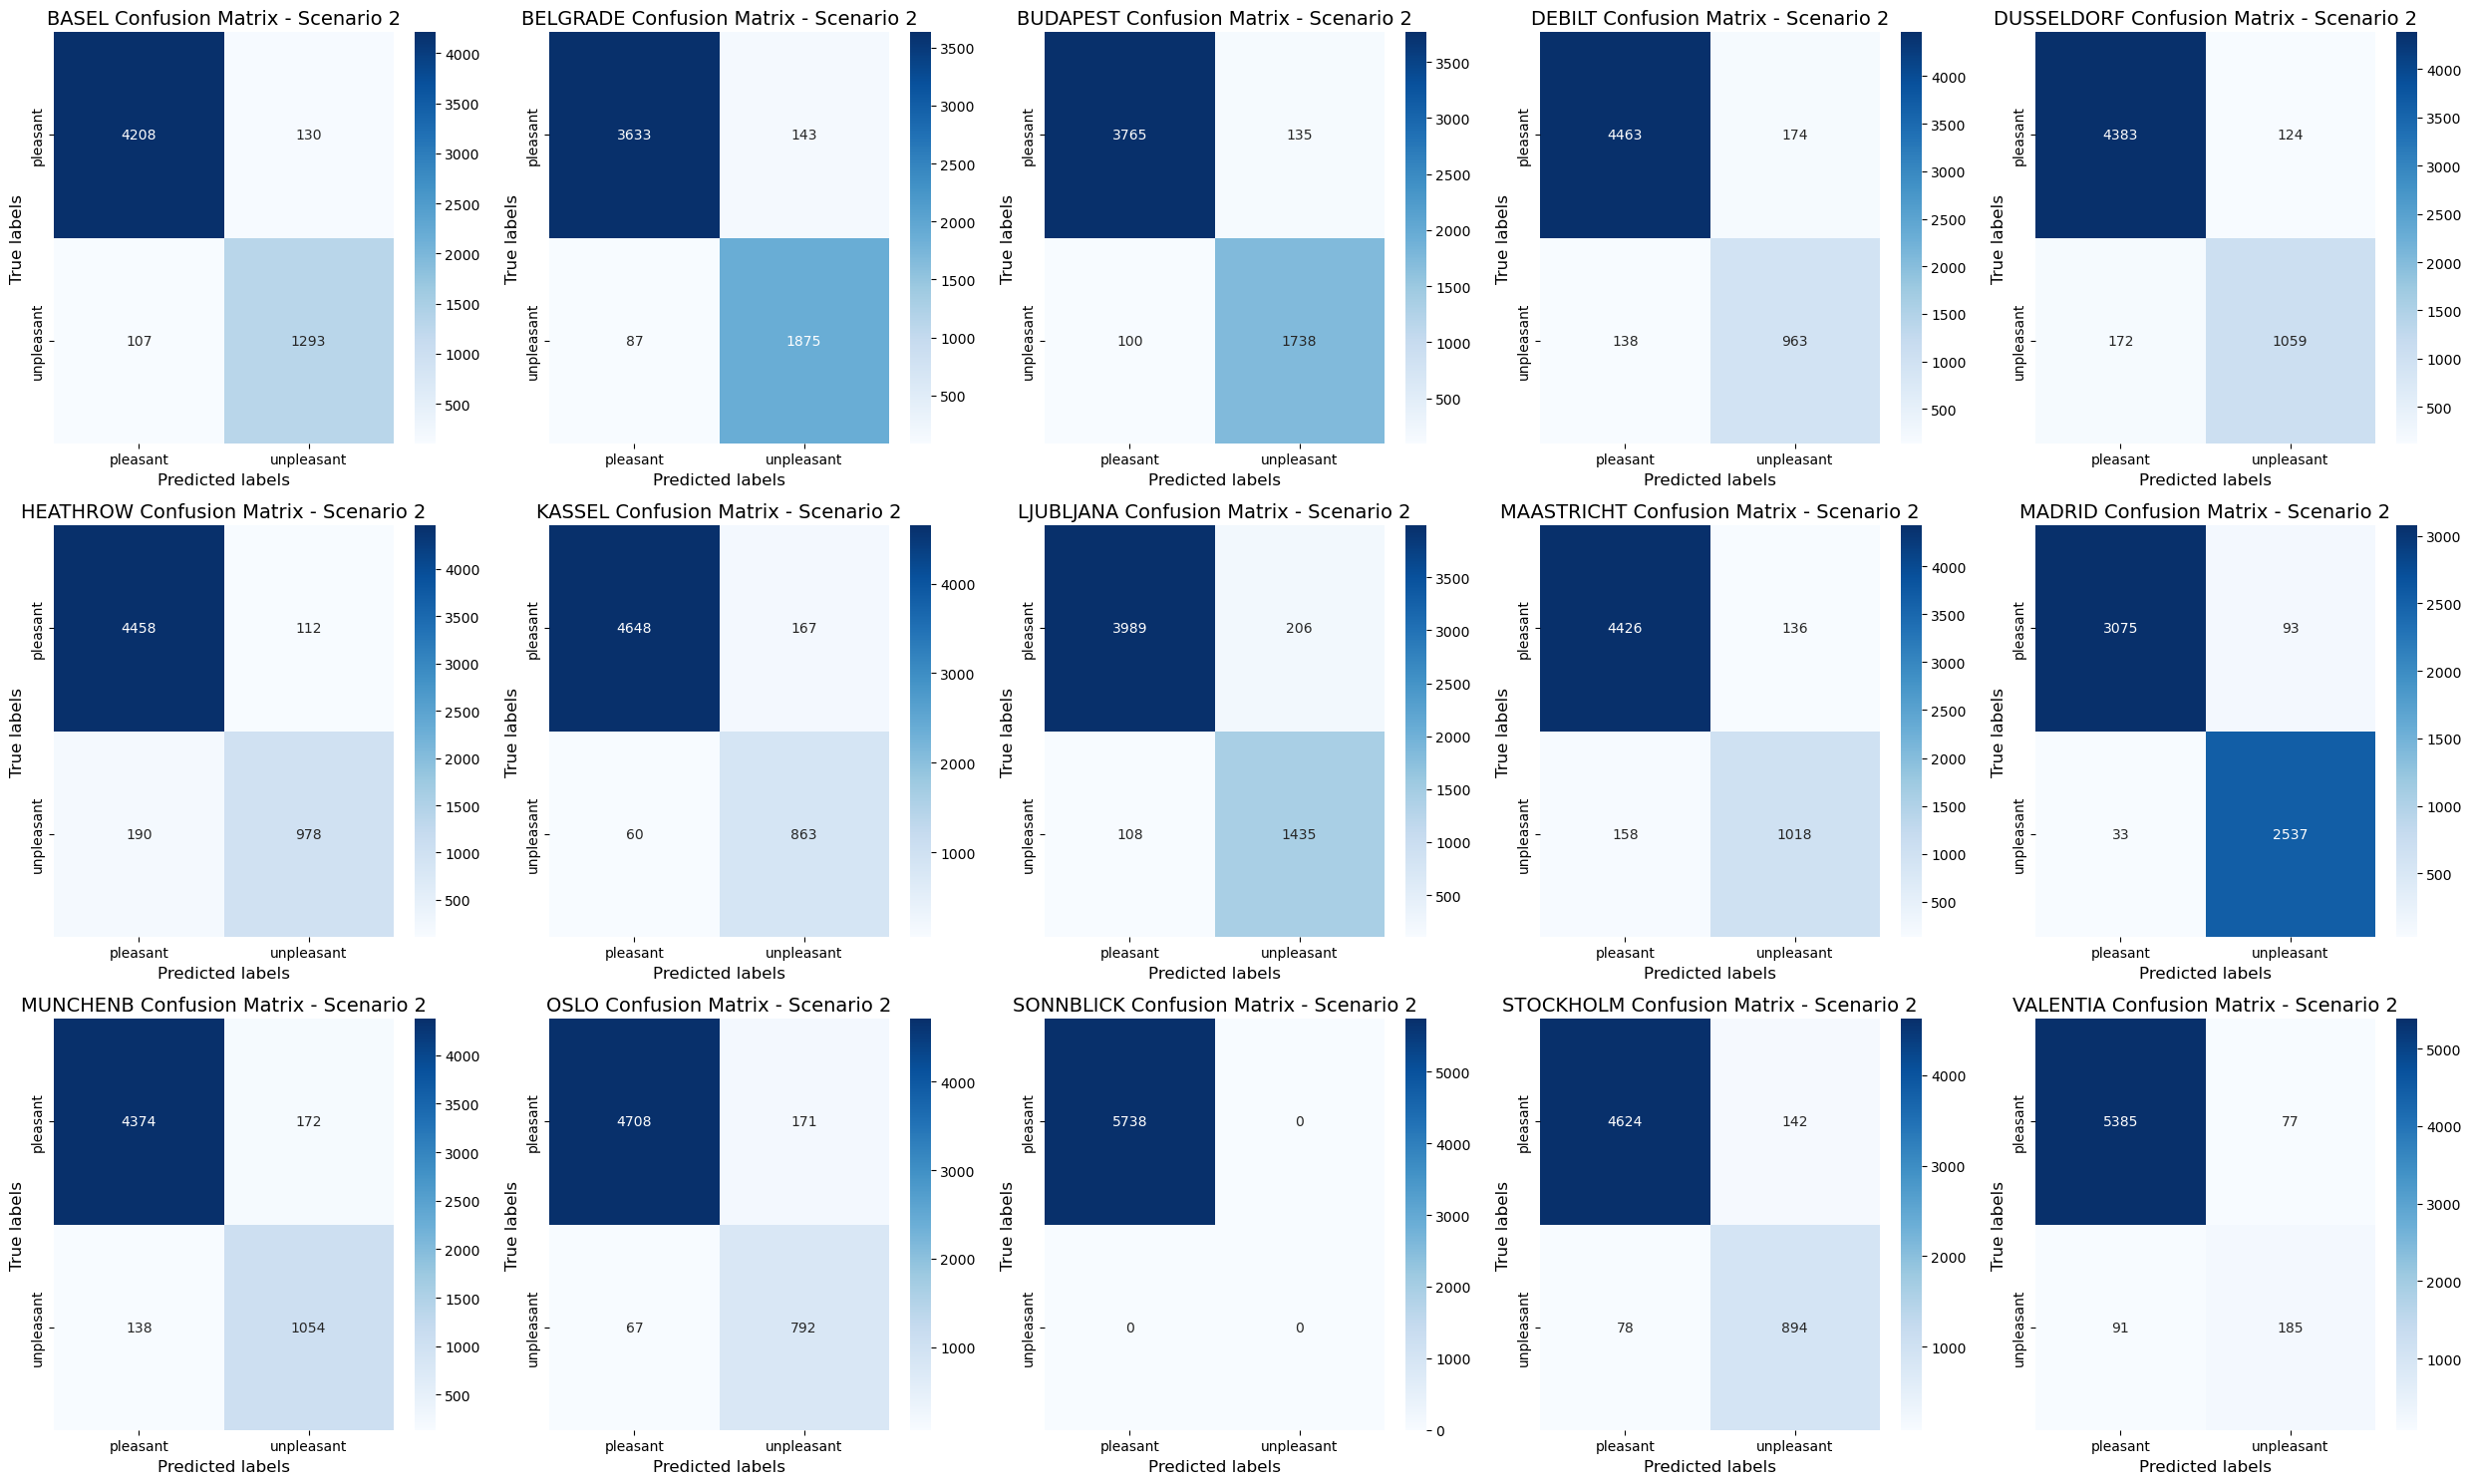

In [86]:
# Define the labels and initialize the figure for subplots
labels = ['pleasant', 'unpleasant']
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()

# Initialize figure for confusion matrices for Scenario 2
fig, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
key = "_pleasant_weather"

# Loop through locations to plot confusion matrices for each weather station
for i in range(3):  # Number of rows
    for j in range(5):  # Number of columns
        if count < len(locations):  # Ensure we don’t exceed the number of locations
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count], labels=[0, 1])
            sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax[i, j])  # Annotate cells with values
            ax[i, j].set_xlabel('Predicted labels', fontsize=12)
            ax[i, j].set_ylabel('True labels', fontsize=12)
            ax[i, j].set_title(f'{name} Confusion Matrix - Scenario 2', fontsize=14)
            ax[i, j].xaxis.set_ticklabels(labels, fontsize=10)
            ax[i, j].yaxis.set_ticklabels(labels, fontsize=10)
            count += 1

# Adjust layout and save the plot for Scenario 2
plt.tight_layout()
output_path_scenario2 = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\Scenario2_confusion_matrices.png'
plt.savefig(output_path_scenario2)
plt.show()

### SCENARIO #3:

In [59]:
# Scenario #3: Adjusted model complexity
mlp = MLPClassifier(hidden_layer_sizes=(50, 30, 15),  # Increased nodes per layer
                    max_iter=3000,                    # Increased max iterations
                    tol=1e-5,                         # Adjusted tolerance
                    alpha=0.0005,                     # Adjusted regularization
                    random_state=42)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Evaluate the adjusted model
# Accuracy on training data
y_pred_train = mlp.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Adjusted Training Accuracy:", train_accuracy)

# Accuracy on testing data
y_pred_test = mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Adjusted Testing Accuracy:", test_accuracy)

Adjusted Training Accuracy: 0.764815245177783
Adjusted Testing Accuracy: 0.6554548623213663


After testing the ANN model with three different configurations of layers, nodes per layer, maximum iterations, and tolerance, the best combination achieved a training accuracy of 76.5% and a testing accuracy of 65.5%. This configuration used three hidden layers with 50, 30, and 15 nodes, 3000 maximum iterations, a tolerance of 1e-5, and a regularization parameter (`alpha`) of 0.0005. This setup provided the best balance between training and testing performance, making it the most effective model for capturing patterns in the data while maintaining decent generalization to unseen data.

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


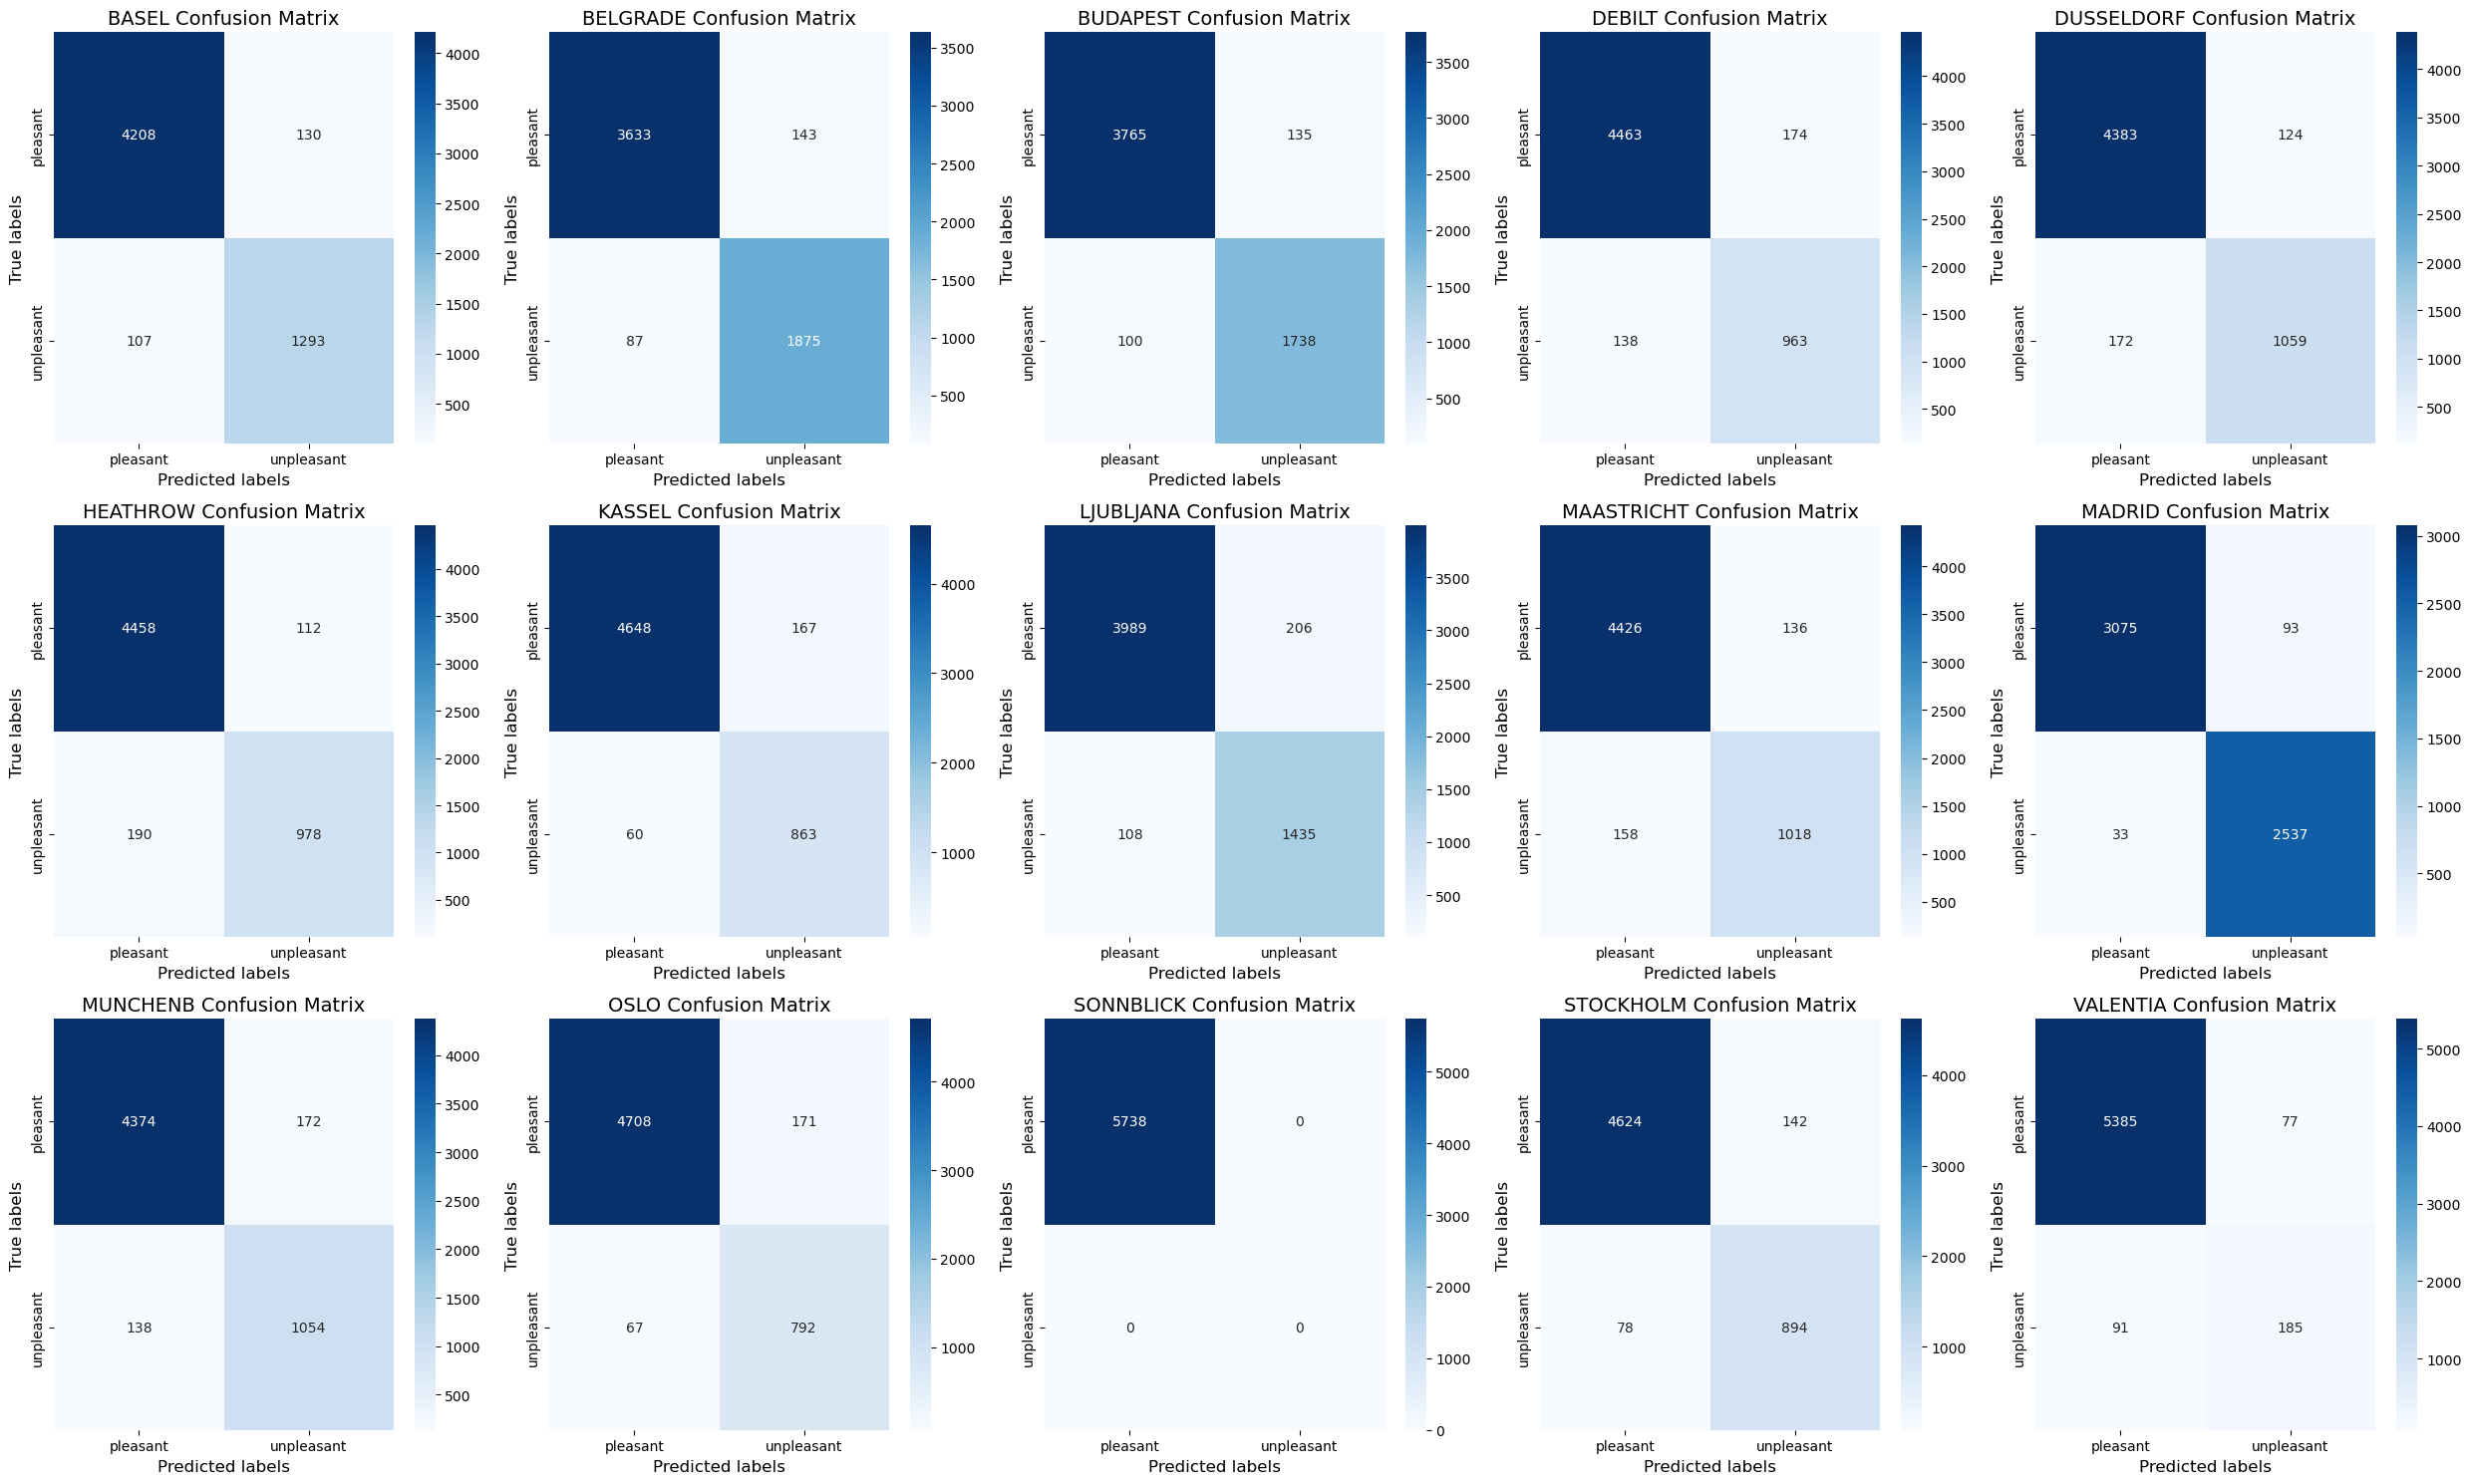

In [77]:
# Define the labels and initialize the figure for subplots
labels = ['pleasant', 'unpleasant']
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)

# Initialize figure
fig, ax = plt.subplots(3, 5, figsize=(25, 15))  # Adjust rows and columns based on the number of locations
count = 0
key = "_pleasant_weather"

# Loop through locations to plot confusion matrices
for i in range(3):  # Number of rows
    for j in range(5):  # Number of columns
        if count < len(locations):  # Ensure we don’t exceed the number of locations
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name + key], y_pred_test[:, count], labels=[0, 1])
            sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax[i, j])  # Annotate cells with values
            
            # Customize labels and title font sizes
            ax[i, j].set_xlabel('Predicted labels', fontsize=12)  # Larger font for x-axis label
            ax[i, j].set_ylabel('True labels', fontsize=12)       # Larger font for y-axis label
            ax[i, j].set_title(f'{name} Confusion Matrix', fontsize=14)  # Larger font for titles
            
            # Customize tick label sizes
            ax[i, j].xaxis.set_ticklabels(labels, fontsize=10)
            ax[i, j].yaxis.set_ticklabels(labels, fontsize=10)
            count += 1

# Adjust layout
plt.tight_layout()

# Save the plot
output_path = r'C:\Users\isaac\Documents\CareerFoundry\3. Machine Learning with Python\04 Analysis\Vizs\1.5 Task\ANN_confusion_matrices_locations.png'
plt.savefig(output_path)

# Show the plot
plt.show()